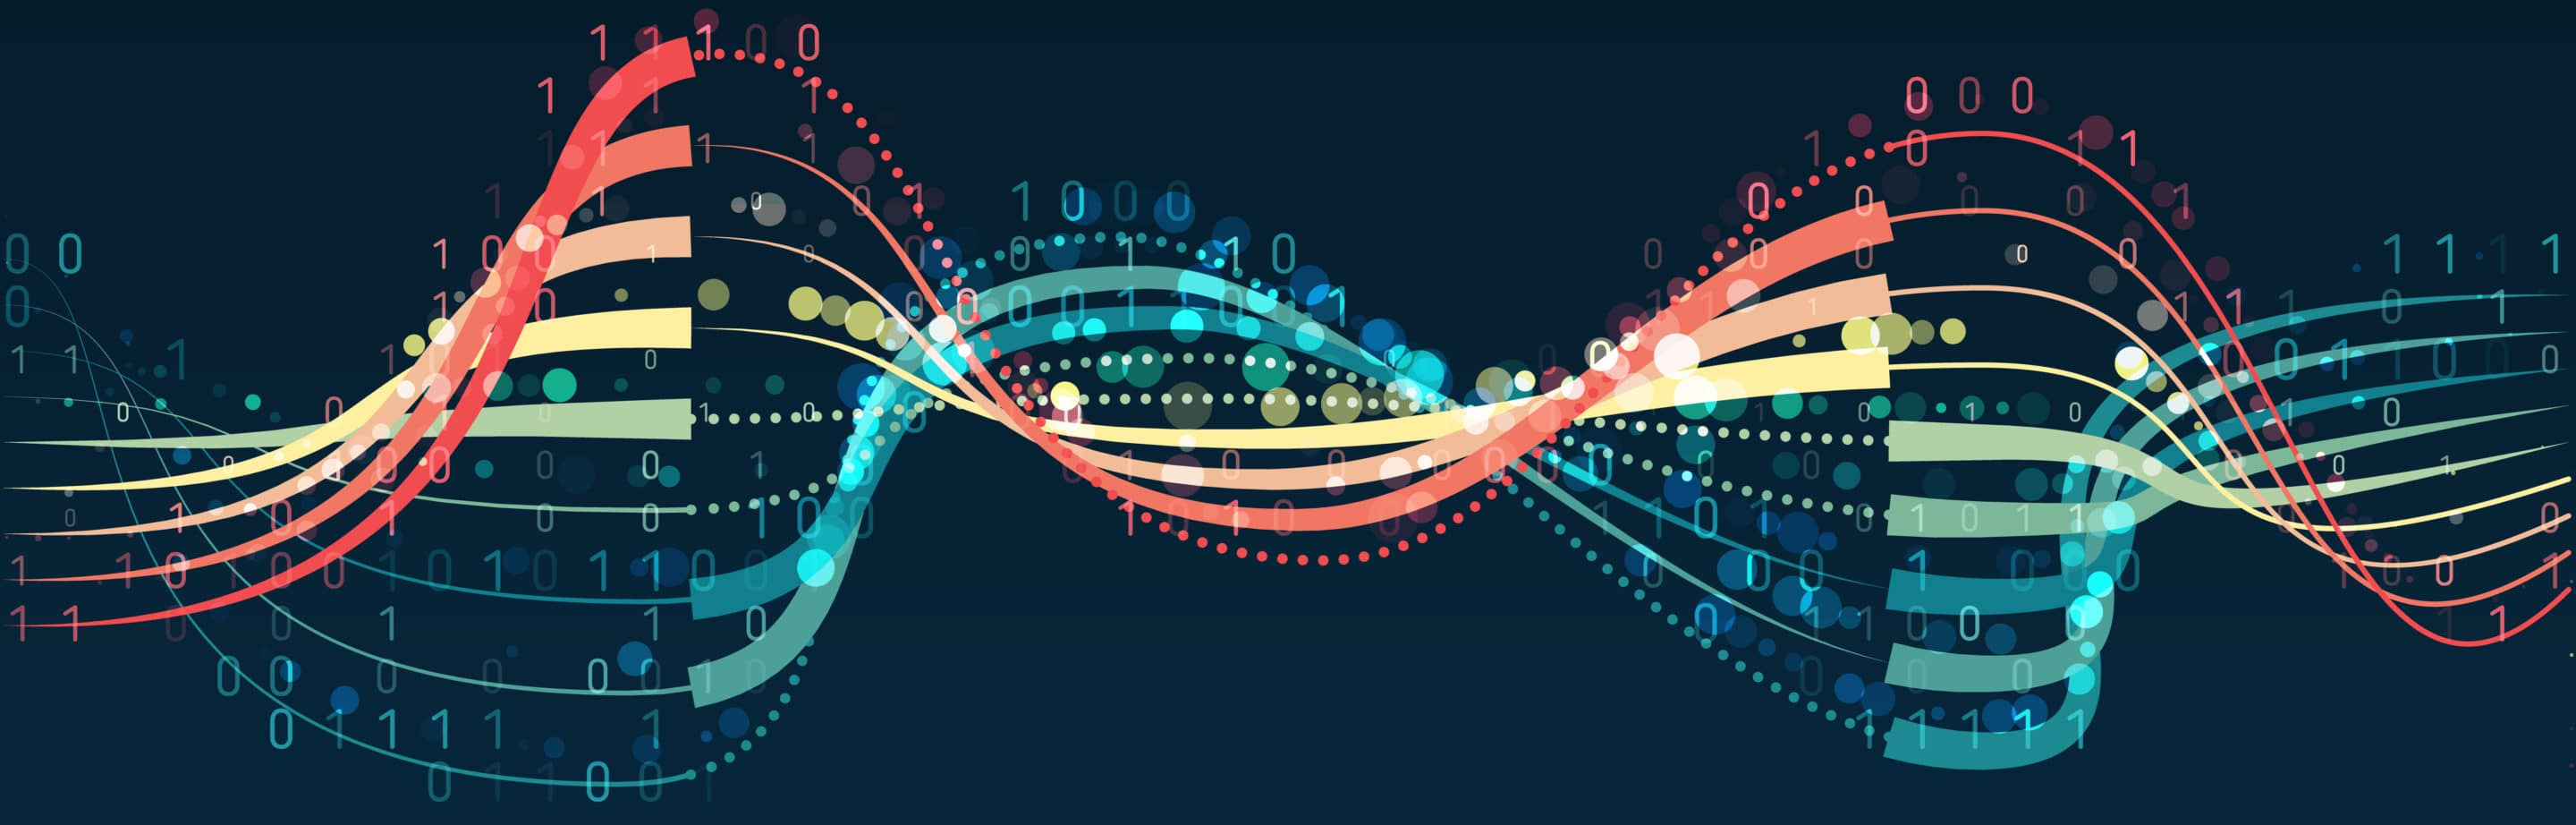

In [2]:
#Imports and load the data csv.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import mean_squared_error, plot_confusion_matrix, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('D:/Fashion-mnist/fashion-mnist_train.csv')
dftest = pd.read_csv('D:/Fashion-mnist/fashion-mnist_test.csv')

In [4]:
#Look at the Data Head
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Data frame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [6]:
#Checking if have some null values for Clean the data
df.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [7]:
#Checking how many rows and columns we have.
df.shape , dftest.shape

((60000, 785), (10000, 785))

In [8]:
#how many Edible, Poisonous we have in the data set.
df['label'].value_counts()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: label, dtype: int64

In [9]:
X_train = df.drop('label',axis = 1)
y_train = df['label']
X_test = dftest.drop('label',axis = 1)
y_test = dftest['label']
X_train.shape , y_train.shape

((60000, 784), (60000,))

In [10]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [11]:
# define the coloums names
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
def get_label_cls(label):
    """given an int label range [0,9], return the string description of that label"""
    return col_names[label]
get_label_cls(1)

'Trouser'

In [12]:
x_train_reshape = X_train.values.reshape(-1,28,28)
x_test_reshape = X_test.values.reshape(-1,28,28)
x_train_reshape.shape

(60000, 28, 28)

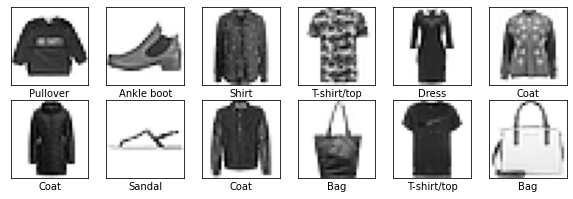

In [13]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i], cmap='Greys')
    plt.xlabel(col_names[y_train[i]])
plt.show()

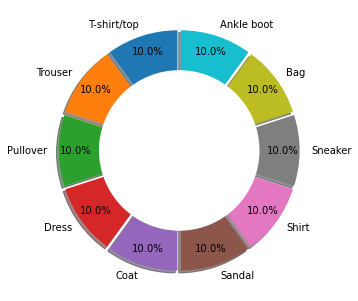

In [14]:
plt.figure(figsize = (5,5))
#explsion
plt.pie(df['label'].value_counts(), labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05), shadow = True)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

In [15]:
#normalize our train and test dataset so that our models converge faster.
X_train = X_train / 255.
X_test = X_test / 255.

In [16]:
#split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [17]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
48572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
38696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
13611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
35213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
31766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,...,0.0,0.0,0.003922,0.0,0.043137,0.145098,0.023529,0.0,0.0,0.0


In [18]:
#random forest classifier model.
RFC = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42)
RFC.fit(X_train, y_train)
y_predict = RFC.predict(X_test)
print('RandomForestClassifier Accuracy is: {}'.format(RFC.score(X_test,y_test)))

RandomForestClassifier Accuracy is: 0.8783333333333333


In [19]:
RFC_REPORT = classification_report(y_test, y_predict)
print(RFC_REPORT)

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1232
           1       0.99      0.96      0.97      1174
           2       0.79      0.83      0.81      1200
           3       0.86      0.92      0.89      1242
           4       0.77      0.82      0.80      1185
           5       0.96      0.96      0.96      1141
           6       0.74      0.57      0.64      1243
           7       0.94      0.94      0.94      1224
           8       0.95      0.98      0.97      1149
           9       0.96      0.95      0.95      1210

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000



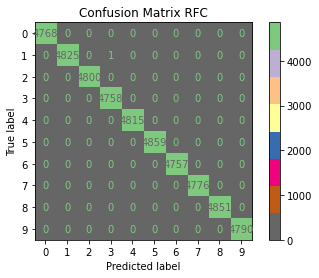

In [20]:
plot_confusion_matrix(RFC, X_train, y_train, cmap = "Accent_r", normalize= None)
plt.title('Confusion Matrix RFC')
plt.show()

In [21]:
RFC_train_acc = (RFC.predict(X_train) == y_train).mean().round()
print("Training Accuracy =", RFC_train_acc)

Training Accuracy = 1.0


In [23]:
#XGBClassifier model.
XGB = XGBClassifier(n_estimators=50, max_depth=5, use_label_encoder =False, eval_metric='mlogloss')
XGB.fit(X_train, y_train)
y_predict = XGB.predict(X_test)
print('XGBClassifier Accuracy is: {}'.format(XGB.score(X_test,y_test)))

XGBClassifier Accuracy is: 0.8936666666666667


In [24]:
XGB_train_acc = (XGB.predict(X_train) == y_train).mean().round()
print("Training Accuracy =", XGB_train_acc)

Training Accuracy = 1.0


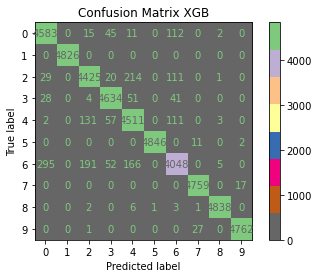

In [25]:
plot_confusion_matrix(XGB, X_train, y_train, cmap = "Accent_r", normalize= None)
plt.title('Confusion Matrix XGB')
plt.show()

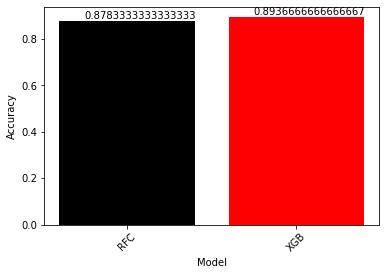

In [58]:
plt.bar(['RFC','XGB'],[RFC.score(X_test,y_test),XGB.score(X_test,y_test)], color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
for i, v in enumerate([RFC.score(X_test,y_test),XGB.score(X_test,y_test)]):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))
xlocs, xlabs = plt.xticks()
plt.show()